In [ ]:
###==================================
### Section ~ 1: Importing Libraries
###==================================

In [176]:
from pathlib import Path
from PIL import ImageFile
import matplotlib.pyplot as plt

In [178]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
###==================================
### Section ~ 2: Project Root Setup
### Description: Set a fixed project root directory
###==================================

In [184]:
# --- Project Root Guessing ---
try:
    # This assumes the notebook is in Kesari/scripts/
    project_root = Path.cwd()
    if not (project_root).exists():
        print("⚠️ Warning: Could not find 'config/data.yaml'. Please verify the project_root.")
        print(f"Guessed project_root: {project_root}")
except Exception as e:
    print(f"Error finding project root: {e}")
    project_root = Path('.')

print(f"Project Root: {project_root}")

Project Root: C:\Users\ADITHYA\OneDrive\Kesari


In [ ]:
###===============================================================
### Section ~ 3: Define Project Directory Structure
### Description: Specify all subdirectories for the ML pipeline
###===============================================================

In [82]:
# --- Define Project Directories ---

# Config
config_dir = project_root / 'config'

In [84]:
# Dataset
dataset_dir = project_root / 'dataset'

In [86]:
# Raw Data
raw_data_dir = dataset_dir / 'raw'
raw_image_dir = raw_data_dir / 'images'
raw_label_dir = raw_data_dir / 'labels'

In [88]:
# Train Data
train_dir = dataset_dir / 'train'
train_raw_images_dir = train_dir / 'raw_images'
train_raw_labels_dir = train_dir / 'raw_labels'
train_aug_images_dir = train_dir / 'aug_images'
train_aug_labels_dir = train_dir / 'aug_labels'

In [90]:
# Validation Data
val_dir = dataset_dir / 'val'
val_images_dir = val_dir / 'images'
val_labels_dir = val_dir / 'labels'

In [92]:
# Test Data
test_dir = dataset_dir / 'test'
test_images_dir = test_dir / 'images'
test_labels_dir = test_dir / 'labels'

In [94]:
# Logs
logs_dir = project_root / 'logs'

In [96]:
# Models
models_dir = project_root / 'models'
models_checkpoints_dir = models_dir / 'checkpoints'
models_final_dir = models_dir / 'final_models'

In [98]:
# Reports
reports_dir = project_root / 'reports'
reports_figures_dir = reports_dir / 'figures'
reports_images_dir = reports_dir / 'images'
reports_tables_dir = reports_dir / 'tables'

In [100]:
# Results
results_dir = project_root / 'results'
results_train_dir = results_dir / 'train'
results_val_dir = results_dir / 'val'
results_test_dir = results_dir / 'test'
results_inference_dir = results_dir / 'inference'

In [102]:
# Scripts
scripts_dir = project_root / 'scripts'

In [ ]:
###=====================================
### Section ~ 4: Create All Directories
###=====================================

In [148]:
# --- Create All Defined Directories ---
print("\n📁 Ensuring project directories exist...\n")

all_dirs = [
    config_dir,
    raw_image_dir,
    raw_label_dir,
    train_raw_images_dir,
    train_raw_labels_dir,
    train_aug_images_dir,
    train_aug_labels_dir,
    val_images_dir,
    val_labels_dir,
    test_images_dir,
    test_labels_dir,
    logs_dir,
    models_checkpoints_dir,
    models_final_dir,
    reports_figures_dir,
    reports_images_dir,
    reports_tables_dir,
    results_train_dir,
    results_val_dir,
    results_test_dir,
    results_inference_dir,
    scripts_dir
]

for d in all_dirs:
    d.mkdir(parents=True, exist_ok=True)
    if d.exists():
        print(f"  - Exists: {d}")
    else:
        print(f"  - ❌ Failed to create: {d}")

print("\nDirectory creation and existence check complete.")


📁 Ensuring project directories exist...

  - Exists: ..\Kesari\config
  - Exists: ..\Kesari\dataset\raw\images
  - Exists: ..\Kesari\dataset\raw\labels
  - Exists: ..\Kesari\dataset\train\raw_images
  - Exists: ..\Kesari\dataset\train\raw_labels
  - Exists: ..\Kesari\dataset\train\aug_images
  - Exists: ..\Kesari\dataset\train\aug_labels
  - Exists: ..\Kesari\dataset\val\images
  - Exists: ..\Kesari\dataset\val\labels
  - Exists: ..\Kesari\dataset\test\images
  - Exists: ..\Kesari\dataset\test\labels
  - Exists: ..\Kesari\logs
  - Exists: ..\Kesari\models\checkpoints
  - Exists: ..\Kesari\models\final_models
  - Exists: ..\Kesari\reports\figures
  - Exists: ..\Kesari\reports\images
  - Exists: ..\Kesari\reports\tables
  - Exists: ..\Kesari\results\train
  - Exists: ..\Kesari\results\val
  - Exists: ..\Kesari\results\test
  - Exists: ..\Kesari\results\inference
  - Exists: ..\Kesari\scripts

Directory creation and existence check complete.


In [ ]:
###======================================
### Section ~ 5: Generate Directory Tree 
###======================================

In [60]:
# --- Directory Structure Visualization ---

# This line is crucial for handling potentially incomplete image files,
# though it's more relevant for *loading* images than creating them.
# It's good practice if you were reading existing, possibly corrupted, images.
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [164]:
def get_directory_structure_text(base_dir: Path, level: int = 3):
    """
    Generates a formatted string that visually represents 
    the directory tree up to a certain depth.
    """
    structure_lines = []
    structure_lines.append(f"{base_dir.name}/")

    for path in sorted(base_dir.rglob('*')):
        try:
            relative_path = path.relative_to(base_dir)
            depth = len(relative_path.parts)
            if depth <= level:
                spacer = "    " * depth
                if path.is_dir():
                    structure_lines.append(f"{spacer}├── {path.name}/")
                else:
                    structure_lines.append(f"{spacer}└── {path.name}")
        except ValueError:
            pass
    return "\n".join(structure_lines)

In [168]:
# Generate and print structure
structure_text = get_directory_structure_text(project_root, level=3)
print(f"--- Generated Directory Structure ---\n\n{structure_text}")

--- Generated Directory Structure ---

Kesari/
    ├── .ipynb_checkpoints/
    ├── config/
        └── data.yaml
    ├── dataset/
        ├── raw/
            ├── images/
            ├── labels/
        ├── test/
            ├── images/
            ├── labels/
        ├── train/
            ├── aug_images/
            ├── aug_labels/
            ├── raw_images/
            ├── raw_labels/
        ├── val/
            ├── images/
            ├── labels/
    ├── logs/
    ├── models/
        ├── checkpoints/
        ├── final_models/
    └── Project_Structure.ipynb
    └── README.md
    ├── reports/
        ├── figures/
        ├── images/
            └── project_structure.png
        └── project_structure.png
        ├── tables/
    └── requirements.txt
    ├── results/
        ├── inference/
        ├── test/
        ├── train/
        ├── val/
    ├── scripts/
        └── Untitled.ipynb


In [ ]:
###=======================================
### Section ~ 6: Save Directory Structure
###=======================================

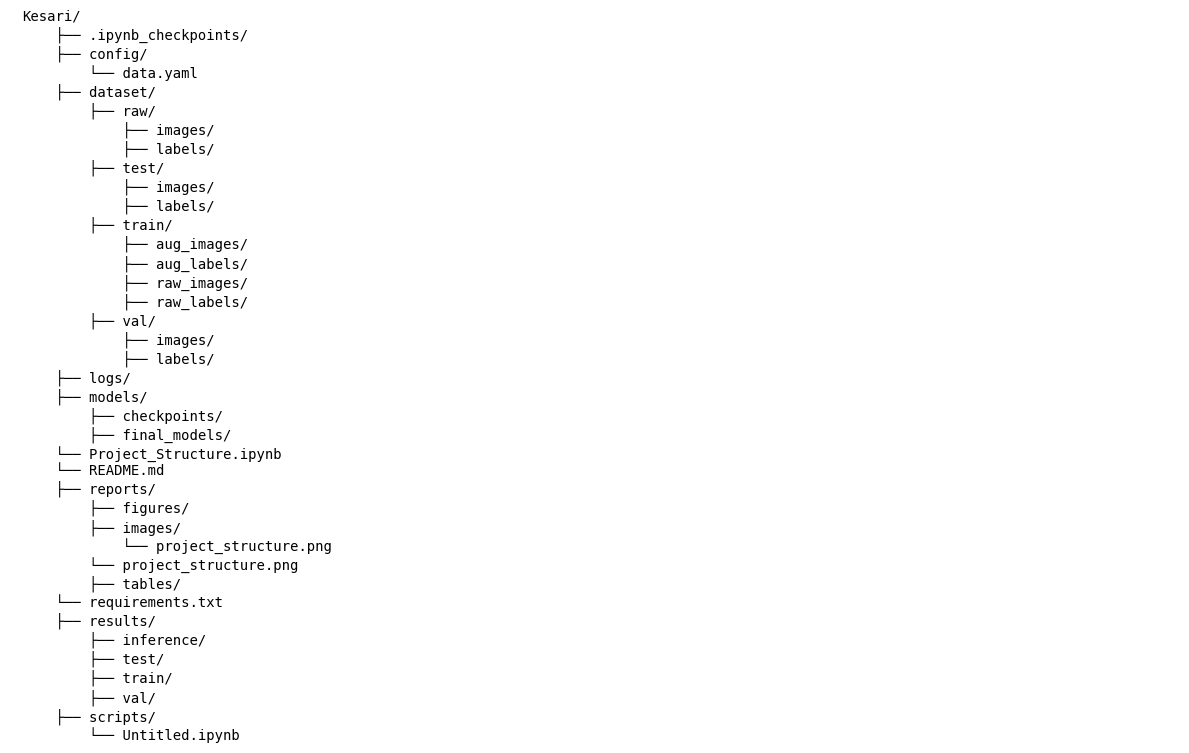


✅ Project directory structure image saved to: ..\Kesari\reports\images\project_structure.png


In [174]:
output_image_path = reports_images_dir / 'project_structure.png'

fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size
ax.text(0.01, 1.0, structure_text, verticalalignment='top',
        fontsize=10, family='monospace', transform=ax.transAxes)
ax.axis('off')

plt.tight_layout()
plt.savefig(output_image_path, bbox_inches='tight', dpi=300)
plt.show()

print(f"\n✅ Project directory structure image saved to: {output_image_path}")